# Newton's law of cooling

- Convective heating/cooling. Convective heat transfer via movement of fluids.

- The rate of heat loss of a body is proportional to the difference in temperatures between the body $(T)$ and its surroundings $(T_s)$.

$\frac{dT}{dt} = -R(T-T_s)$

where $R$ is the cooling constant and $T_s$ is the "surrounding" temperature.

# Heat conduction in 1D

- Heat flux proportional to temperature gradient

$\frac{\partial Q(x,t)}{\partial t} = - A \kappa \frac{\partial T(x,t)}{dx}$

where $Q$ is energy, $T$ is temperature, and $\kappa$ is conductivity

- Steady state $\implies \partial Q/\partial t = const$ and $\partial T/\partial x = dT/dx = const$

- Convection and the coffee cup (boundary layer model)

$\frac{dQ}{dt} = - A \kappa  \left(\frac{T- T_s}{\Delta x} \right) = const$ 

$ dQ_{water} = MCdT$

where $M$ is the mass of water and $C = 4.19 \times 10^3$ J/kg$^\circ$C.

$MC \frac{dT}{dt} = \frac{-\kappa A}{\Delta x} (T- T_s) \implies\frac{dT}{dt} = \frac{-\kappa A}{MC\Delta x} (T- T_s) = -R (T- T_s)$

# Example

At midnight, with the temperature inside your house at 70 deg F and the temperature outside at -20 deg F, your furnace breaks down.  Assuming that the cooling rate is 0.04 hours$^{-1}$, when will the house reach 32 deg F?

Numerical solution: Solve directly by stepping the equation in time (requires an initial temperature as a "boundary value problem). 

$\frac{\Delta T}{\Delta t} = -R (T- T_s)$

$\frac{T_1 - T_0}{t_1 - t_0} = -R(T_0-T_s)$

Solve for the updated temperature, or

$T_1 = T_0 - R (T_0-T_s)(t_1-t_0)$

The iterative solution is

$T_2 = T_1 - R (T_1-T_s)(t_2-t_1)$

$T_3 = T_2 - R (T_2-T_s)(t_3-t_2)$

$T_4 = T_3 - R (T_3-T_s)(t_4-t_3)$

$ \cdot \cdot \cdot$

If we take a uniform time step $\Delta t$, then this iterative solution can be written, more compactly, as the **Euler Algorithm**, or

$t^n = t^{n-1} + \Delta t$

$T^n  = T^{n-1} - R (T^{n-1} - T_s) \Delta t$

where $n$ is an integer for the time step.

The exact solution (analytical solution to the ordinary differential equation) is

$T = T_s + T_0 e^{-Rt}$

$T_0 = T(t=0) - T_s$

Write a python script to plot the numerical and the analytical solution.


Text(0.5, 0, 'time (hours)')

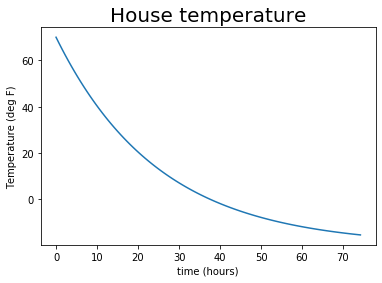

In [2]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

def exact_soln(x,T0,R,Ts):
    return (T0-Ts)*np.exp(-R*x)+Ts

R = 0.04  #cooling rate in hours^-1
Ts = -20  #outside temperature
T0 = 70   #initial inside temperature

#plot the analytical result first

tfinal = 3/R  #plot to 3 e-folds
nt = 100      #number of points to plot

#Temp = np.zeros(nt)
#Temp[0] = T0
time = np.arange(0,tfinal,tfinal/nt)

plt.figure()
plt.plot(time,exact_soln(time,T0,R,Ts), label='analytical')
plt.title('House temperature',fontsize=20)
plt.ylabel('Temperature (deg F)')
plt.xlabel('time (hours)')
#plt.show



<function matplotlib.pyplot.show(*args, **kw)>

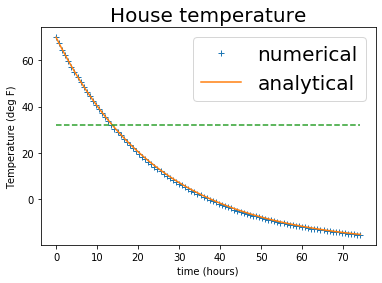

In [3]:
#numerical solution

def numerical_soln(T0,Ts,R,dt):
    return T0-R*(T0-Ts)*dt

dt = time[1]-time[0]
Temp = []
Temp.append(T0)
Tinit=T0

for i in range(1,len(time)):
    tmp = numerical_soln(Tinit,Ts,R,dt)
    Temp.append(tmp)
    Tinit = tmp

plt.figure()    
plt.plot(time,Temp, '+', label='numerical')
plt.plot(time,exact_soln(time,T0,R,Ts), label='analytical')
plt.plot(time,np.ones(nt)*32,'--')
plt.title('House temperature',fontsize=20)
plt.ylabel('Temperature (deg F)')
plt.xlabel('time (hours)')
plt.legend(fontsize=20)

plt.show




<function matplotlib.pyplot.show(*args, **kw)>

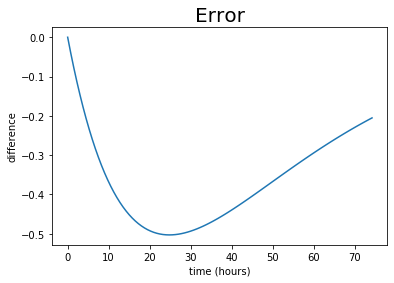

In [148]:
# plot the difference between exact and numerical solutions.

plt.figure()
plt.plot(time, Temp-exact_soln(time,T0,R,Ts))
plt.title('Error',fontsize=20)
plt.ylabel('difference')
plt.xlabel('time (hours)')
plt.show

In [149]:
# determine time when house temperature reaches 32 deg F
#use the "where" function
T32 = np.ones(nt)*32
wh = np.nonzero(np.abs(Temp-T32) == np.min(np.abs(Temp-T32)))
print('Time to house freezing: ', time[wh[0]], ' hours')



Time to house freezing:  [13.5]  hours


In [5]:
from numpy import *

x = array([1,2,3])
print(x)

[1 2 3]
